# 2021 W34：“Entry-level” jobs on LinkedIn require 3+ years of experience

## Import packages

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## Read data

In [2]:
df = pd.read_excel('../data/Entry-Level LinkedIn Jobs.xlsx', index_col=0)

In [3]:
df

,"""Entry-level"" jobs on LinkedIn require 3+ years of experience"
Job,
Software & IT Services,0.603
Manufacturing,0.500
Design,0.470
Education,0.450
Finance,0.438
Nonprofit,0.379
Wellness & Fitness,0.350
Media & Communications,0.286
Healthcare,0.241


## Visualization

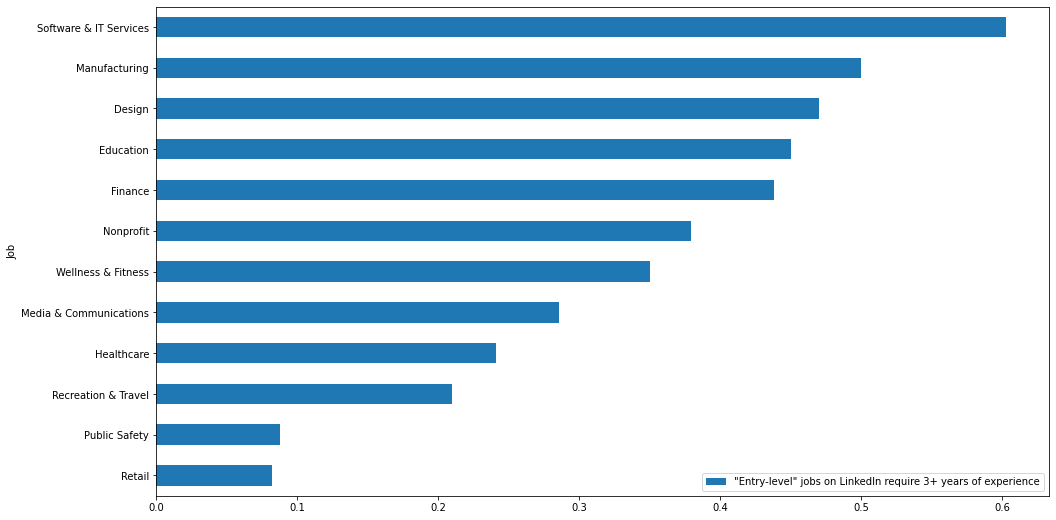

In [9]:
fig, ax = plt.subplots(figsize=(16,9))
df.plot(kind='barh', ax=ax)


ax.invert_yaxis()